<a href="https://colab.research.google.com/github/Angel353/CADII_Equipo1/blob/main/Airbnb_Bases/Seattle/Regresi%C3%B3n%20Lineal/EntireHome_Apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Seattle_Outliers_categorizacion.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostAcceptanceCat,hostVerifCat,neighbourhood_Category_num,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,24/06/2024,city scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire guesthouse,Entire home/apt,1 bath,"[""Keypad"", ""Refrigerator"", ""Patio or balcony"",...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,24/06/2024,city scrape,Angielena,within a few hours,"['email', 'phone']",Georgetown,Private room in rental unit,Private room,3 shared baths,"[""Rice maker"", ""Shared patio or balcony"", ""Ref...",...,(92 - 100%) Excelente,(2) Verificación moderada,4,(0 - 1) Una cama,(1) Reseña mensual mínima,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire home,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,24/06/2024,city scrape,Cassie,within a few hours,"['email', 'phone']",Fairmount Park,Entire guest suite,Entire home/apt,1 bath,"[""Single level home"", ""Refrigerator"", ""Luggage...",...,(74 - 82%) Muy bueno,(2) Verificación moderada,4,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,25/06/2024,previous scrape,Joyce,within a few hours,"['email', 'phone']",Wallingford,Entire rental unit,Entire home/apt,1 bath,"[""Smart lock"", ""Refrigerator"", ""Patio or balco...",...,(37 - 45%) Medio,(2) Verificación moderada,2,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(4) Satisfecho,(5) Muy satisfecho
5,24/06/2024,city scrape,Amanda,within an hour,"['email', 'phone']",Whittier Heights,Entire guest suite,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Refrigerator"", ""S...",...,(92 - 100%) Excelente,(2) Verificación moderada,3,(2) Pocas camas,(5 - 7) Buen número de reseñas mensuales,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    6442 non-null   object 
 1   source                          6442 non-null   object 
 2   host_name                       6442 non-null   object 
 3   host_response_time              6442 non-null   object 
 4   host_verifications              6442 non-null   object 
 5   neighbourhood_cleansed          6442 non-null   object 
 6   property_type                   6442 non-null   object 
 7   room_type                       6442 non-null   object 
 8   bathrooms_text                  6442 non-null   object 
 9   amenities                       6442 non-null   object 
 10  calendar_last_scraped           6442 non-null   object 
 11  host_id                         6442 non-null   int64  
 12  host_since                      64

In [4]:
# Conteo de los tipos de habitaciones
df[["room_type","room_type_num"]].value_counts()

,,count
room_type,room_type_num,
Entire home/apt,0,5387
Private room,2,1024
Hotel room,1,21
Shared room,3,10


In [5]:
# Fragmentamos el dataframe solo con las variables a analizar
df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [6]:
df1["review_scores_location"]

,review_scores_location
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
6437,5.0
6438,5.0
6439,5.0
6440,5.0


In [7]:
# Corroboramos
df1["room_type_num"].value_counts()

,count
room_type_num,
0,5387
2,1024
1,21
3,10


## Dividir el DataFrame según el tipo de habitación
## Entire home/apt | 0

In [8]:
dfHome0 = df1[df1["room_type_num"] == 0]
dfHome0

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,44.0,90.0,5.0,5.0,99.0,147,160.0,0.88,5.0,1
2,0,80.0,100.0,5.0,5.0,189.0,133,97.0,0.64,5.0,23
3,0,80.0,100.0,5.0,5.0,125.0,1,77.0,0.51,5.0,2
4,0,44.0,90.0,5.0,4.0,167.0,16,96.0,0.61,5.0,0
5,0,100.0,100.0,5.0,5.0,94.0,96,63.0,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...
6434,0,97.0,99.0,5.0,5.0,156.0,246,0.0,1.78,5.0,0
6435,0,99.0,100.0,5.0,5.0,179.0,296,0.0,1.78,5.0,0
6437,0,99.0,100.0,5.0,5.0,481.0,324,0.0,1.78,5.0,0
6439,0,92.3,97.6,5.0,5.0,222.0,171,0.0,1.78,5.0,0


## Filtro: “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

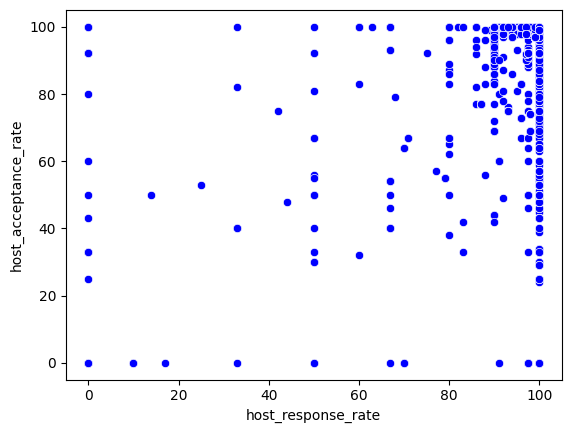

In [9]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome0)

In [10]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome0[["host_response_rate"]] # Independiente = x
Var_Dep = dfHome0[["host_acceptance_rate"]] # Dependiente = y

In [11]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [13]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.70924085]]),
 'rank_': 1,
 'singular_': array([714.425582]),
 'intercept_': array([23.66770144])}

## Modelo matemático: y = 0.70924085x + 23.66770144

In [14]:
# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = dfHome0[['host_response_rate']])
y_pred

array([[87.49937766],
       [94.59178613],
       [94.59178613],
       ...,
       [94.59178613],
       [92.8896081 ],
       [94.59178613]])

In [15]:
# Insertamos la columna de predicciones en el df
dfHome0.insert(2, 'Predict1', y_pred)
dfHome0

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,44.0,87.499378,90.0,5.0,5.0,99.0,147,160.0,0.88,5.0,1
2,0,80.0,94.591786,100.0,5.0,5.0,189.0,133,97.0,0.64,5.0,23
3,0,80.0,94.591786,100.0,5.0,5.0,125.0,1,77.0,0.51,5.0,2
4,0,44.0,87.499378,90.0,5.0,4.0,167.0,16,96.0,0.61,5.0,0
5,0,100.0,94.591786,100.0,5.0,5.0,94.0,96,63.0,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
6434,0,97.0,93.882545,99.0,5.0,5.0,156.0,246,0.0,1.78,5.0,0
6435,0,99.0,94.591786,100.0,5.0,5.0,179.0,296,0.0,1.78,5.0,0
6437,0,99.0,94.591786,100.0,5.0,5.0,481.0,324,0.0,1.78,5.0,0
6439,0,92.3,92.889608,97.6,5.0,5.0,222.0,171,0.0,1.78,5.0,0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

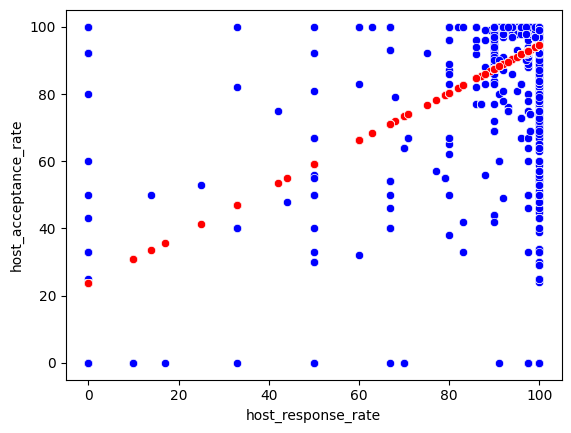

In [16]:
# Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome0)
sns.scatterplot(x = 'host_response_rate', y = 'Predict1', color = "red", data = dfHome0)

In [17]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_0 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_0 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.19573594698382513

In [18]:
# Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_0 = np.sqrt(coef_Deter_0)
coef_Correl_0

0.4424205544318947

## Filtro: “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

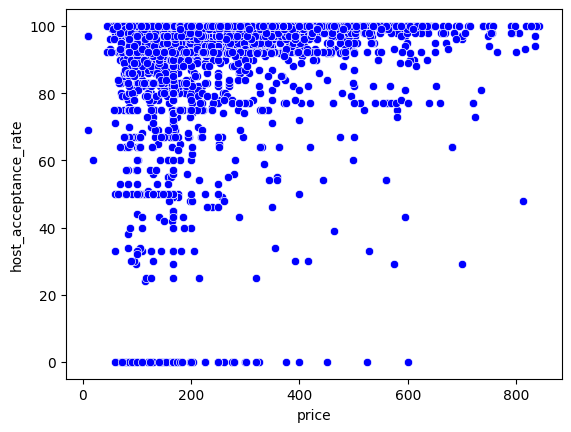

In [19]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome0)

In [20]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome0[["price"]]
Var_Dep = dfHome0[["host_acceptance_rate"]]

In [21]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.00668928]]),
 'rank_': 1,
 'singular_': array([8780.74191685]),
 'intercept_': array([91.72406232])}

## Modelo matemático: y = 0.00668928x + 91.72406232

In [22]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "price"
y_pred = model.predict(X = dfHome0[['price']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome0.insert(8, 'Predict2', y_pred)
dfHome0

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,44.0,87.499378,90.0,5.0,5.0,99.0,147,92.386301,160.0,0.88,5.0,1
2,0,80.0,94.591786,100.0,5.0,5.0,189.0,133,92.988336,97.0,0.64,5.0,23
3,0,80.0,94.591786,100.0,5.0,5.0,125.0,1,92.560222,77.0,0.51,5.0,2
4,0,44.0,87.499378,90.0,5.0,4.0,167.0,16,92.841172,96.0,0.61,5.0,0
5,0,100.0,94.591786,100.0,5.0,5.0,94.0,96,92.352855,63.0,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,0,97.0,93.882545,99.0,5.0,5.0,156.0,246,92.767590,0.0,1.78,5.0,0
6435,0,99.0,94.591786,100.0,5.0,5.0,179.0,296,92.921444,0.0,1.78,5.0,0
6437,0,99.0,94.591786,100.0,5.0,5.0,481.0,324,94.941607,0.0,1.78,5.0,0
6439,0,92.3,92.889608,97.6,5.0,5.0,222.0,171,93.209083,0.0,1.78,5.0,0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

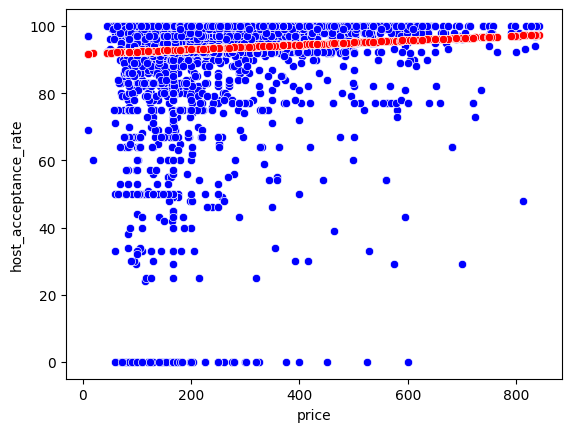

In [23]:
# Gráfica de comparación
sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome0)
sns.scatterplot(x = 'price', y = 'Predict2', color = "red", data = dfHome0)

In [24]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1

0.0026302101779714926

In [25]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1

0.051285574755202776

## Filtro: “host_acceptance_rate vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

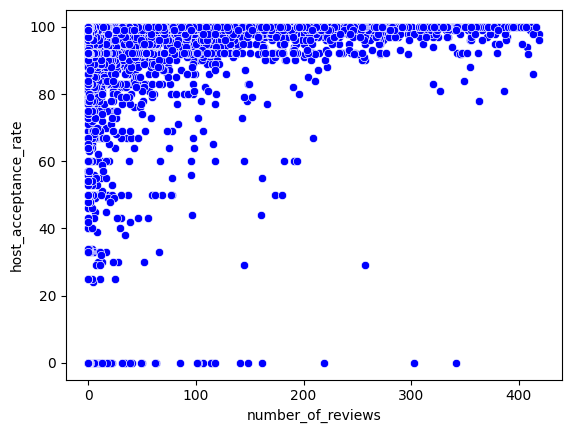

In [26]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome0)

In [27]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome0[["number_of_reviews"]]
Var_Dep = dfHome0[["host_acceptance_rate"]]

In [28]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.02887495]]),
 'rank_': 1,
 'singular_': array([6254.57047876]),
 'intercept_': array([91.24597789])}

## Modelo matemático y = 0.02887495x + 91.24597789

In [29]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome0[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome0.insert(1, 'Predict3', y_pred)
dfHome0

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,95.865969,44.0,87.499378,90.0,5.0,5.0,99.0,147,92.386301,160.0,0.88,5.0,1
2,0,94.046848,80.0,94.591786,100.0,5.0,5.0,189.0,133,92.988336,97.0,0.64,5.0,23
3,0,93.469349,80.0,94.591786,100.0,5.0,5.0,125.0,1,92.560222,77.0,0.51,5.0,2
4,0,94.017973,44.0,87.499378,90.0,5.0,4.0,167.0,16,92.841172,96.0,0.61,5.0,0
5,0,93.065100,100.0,94.591786,100.0,5.0,5.0,94.0,96,92.352855,63.0,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,0,91.245978,97.0,93.882545,99.0,5.0,5.0,156.0,246,92.767590,0.0,1.78,5.0,0
6435,0,91.245978,99.0,94.591786,100.0,5.0,5.0,179.0,296,92.921444,0.0,1.78,5.0,0
6437,0,91.245978,99.0,94.591786,100.0,5.0,5.0,481.0,324,94.941607,0.0,1.78,5.0,0
6439,0,91.245978,92.3,92.889608,97.6,5.0,5.0,222.0,171,93.209083,0.0,1.78,5.0,0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

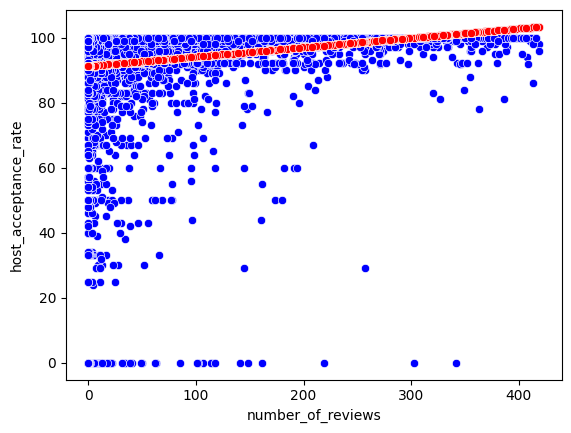

In [30]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome0)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict3', color = "red", data = dfHome0)

In [31]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2

0.02486603259661757

In [32]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2

0.15768967181339927

## Filtro: “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

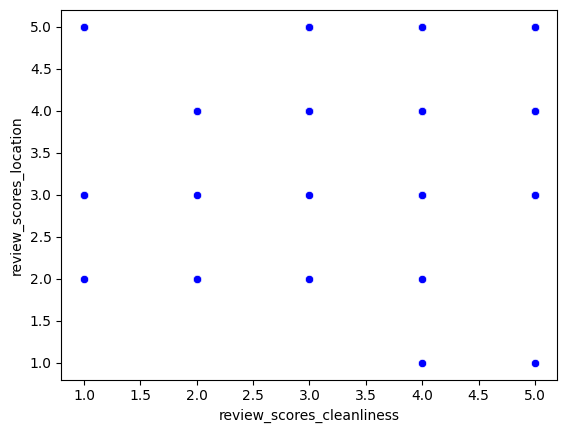

In [33]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome0)

In [34]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome0[["review_scores_cleanliness"]]
Var_Dep = dfHome0[["review_scores_location"]]

In [35]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.34816024]]),
 'rank_': 1,
 'singular_': array([22.34893806]),
 'intercept_': array([3.23070036])}

## Modelo Matemático: y = 0.34816024x + 3.23070036

In [36]:
# Predecimos los valores de "review_scores_location" a partir de la variable "review_scores_cleanliness"
y_pred = model.predict(X = dfHome0[['review_scores_cleanliness']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome0.insert(6, 'Predict4', y_pred)
dfHome0

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,95.865969,44.0,87.499378,90.0,5.0,4.971502,5.0,99.0,147,92.386301,160.0,0.88,5.0,1
2,0,94.046848,80.0,94.591786,100.0,5.0,4.971502,5.0,189.0,133,92.988336,97.0,0.64,5.0,23
3,0,93.469349,80.0,94.591786,100.0,5.0,4.971502,5.0,125.0,1,92.560222,77.0,0.51,5.0,2
4,0,94.017973,44.0,87.499378,90.0,5.0,4.623341,4.0,167.0,16,92.841172,96.0,0.61,5.0,0
5,0,93.065100,100.0,94.591786,100.0,5.0,4.971502,5.0,94.0,96,92.352855,63.0,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,0,91.245978,97.0,93.882545,99.0,5.0,4.971502,5.0,156.0,246,92.767590,0.0,1.78,5.0,0
6435,0,91.245978,99.0,94.591786,100.0,5.0,4.971502,5.0,179.0,296,92.921444,0.0,1.78,5.0,0
6437,0,91.245978,99.0,94.591786,100.0,5.0,4.971502,5.0,481.0,324,94.941607,0.0,1.78,5.0,0
6439,0,91.245978,92.3,92.889608,97.6,5.0,4.971502,5.0,222.0,171,93.209083,0.0,1.78,5.0,0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

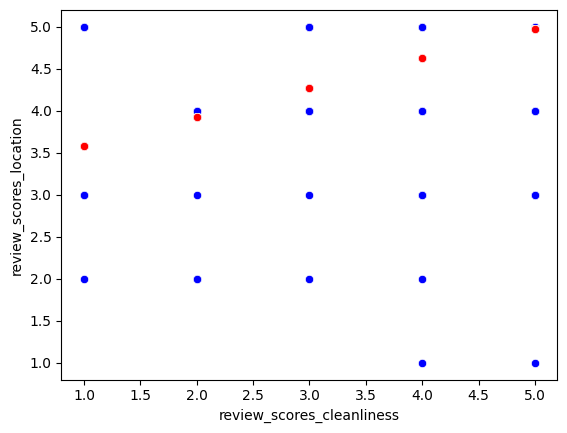

In [37]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome0)
sns.scatterplot(x = 'review_scores_cleanliness', y = 'Predict4', color = "red", data = dfHome0)

In [38]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3

0.16799694613870075

In [39]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3

0.4098743052921234

## Filtro: availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

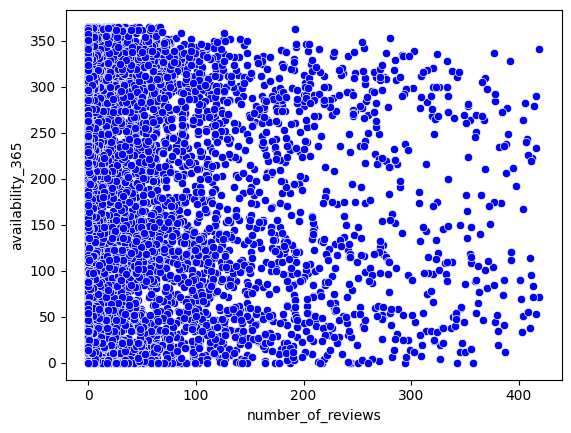

In [40]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome0)

In [41]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome0[["number_of_reviews"]]
Var_Dep = dfHome0[["availability_365"]]

In [42]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.14368344]]),
 'rank_': 1,
 'singular_': array([6254.57047876]),
 'intercept_': array([190.83794344])}

## Modelo Matemático: y = -0.14368344x + 190.83794344

In [43]:
# Predecimos los valores de "availability_365" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome0[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome0.insert(7, 'Predict5', y_pred)
dfHome0

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,95.865969,44.0,87.499378,90.0,5.0,4.971502,167.848592,5.0,99.0,147,92.386301,160.0,0.88,5.0,1
2,0,94.046848,80.0,94.591786,100.0,5.0,4.971502,176.900649,5.0,189.0,133,92.988336,97.0,0.64,5.0,23
3,0,93.469349,80.0,94.591786,100.0,5.0,4.971502,179.774318,5.0,125.0,1,92.560222,77.0,0.51,5.0,2
4,0,94.017973,44.0,87.499378,90.0,5.0,4.623341,177.044333,4.0,167.0,16,92.841172,96.0,0.61,5.0,0
5,0,93.065100,100.0,94.591786,100.0,5.0,4.971502,181.785886,5.0,94.0,96,92.352855,63.0,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,0,91.245978,97.0,93.882545,99.0,5.0,4.971502,190.837943,5.0,156.0,246,92.767590,0.0,1.78,5.0,0
6435,0,91.245978,99.0,94.591786,100.0,5.0,4.971502,190.837943,5.0,179.0,296,92.921444,0.0,1.78,5.0,0
6437,0,91.245978,99.0,94.591786,100.0,5.0,4.971502,190.837943,5.0,481.0,324,94.941607,0.0,1.78,5.0,0
6439,0,91.245978,92.3,92.889608,97.6,5.0,4.971502,190.837943,5.0,222.0,171,93.209083,0.0,1.78,5.0,0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

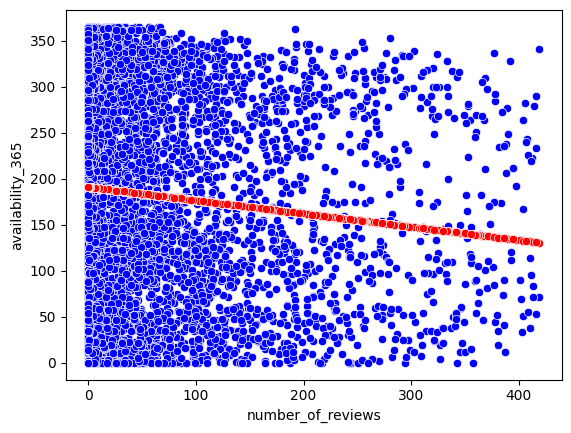

In [44]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome0)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict5', color = "red", data = dfHome0)

In [45]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4

0.011605314990562166

In [46]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4

0.10772796754122008

## Filtro: reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

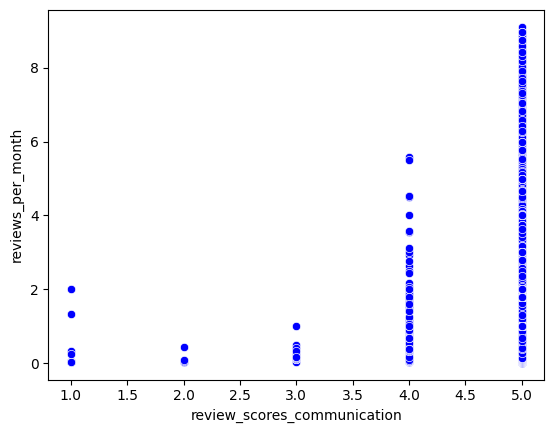

In [47]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome0)

In [48]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome0[["review_scores_communication"]]
Var_Dep = dfHome0[["reviews_per_month"]]

In [49]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.03126335]]),
 'rank_': 1,
 'singular_': array([21.15966862]),
 'intercept_': array([-2.88652179])}

## Modelo Matemático: y = 1.03126335x - 2.88652179

In [50]:
# Predecimos los valores de "reviews_per_month" a partir de la variable "review_scores_communication"
y_pred = model.predict(X = dfHome0[['review_scores_communication']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome0.insert(13, 'Predict6', y_pred)
dfHome0

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,95.865969,44.0,87.499378,90.0,5.0,4.971502,167.848592,5.0,99.0,147,92.386301,160.0,2.269795,0.88,5.0,1
2,0,94.046848,80.0,94.591786,100.0,5.0,4.971502,176.900649,5.0,189.0,133,92.988336,97.0,2.269795,0.64,5.0,23
3,0,93.469349,80.0,94.591786,100.0,5.0,4.971502,179.774318,5.0,125.0,1,92.560222,77.0,2.269795,0.51,5.0,2
4,0,94.017973,44.0,87.499378,90.0,5.0,4.623341,177.044333,4.0,167.0,16,92.841172,96.0,2.269795,0.61,5.0,0
5,0,93.065100,100.0,94.591786,100.0,5.0,4.971502,181.785886,5.0,94.0,96,92.352855,63.0,2.269795,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,0,91.245978,97.0,93.882545,99.0,5.0,4.971502,190.837943,5.0,156.0,246,92.767590,0.0,2.269795,1.78,5.0,0
6435,0,91.245978,99.0,94.591786,100.0,5.0,4.971502,190.837943,5.0,179.0,296,92.921444,0.0,2.269795,1.78,5.0,0
6437,0,91.245978,99.0,94.591786,100.0,5.0,4.971502,190.837943,5.0,481.0,324,94.941607,0.0,2.269795,1.78,5.0,0
6439,0,91.245978,92.3,92.889608,97.6,5.0,4.971502,190.837943,5.0,222.0,171,93.209083,0.0,2.269795,1.78,5.0,0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

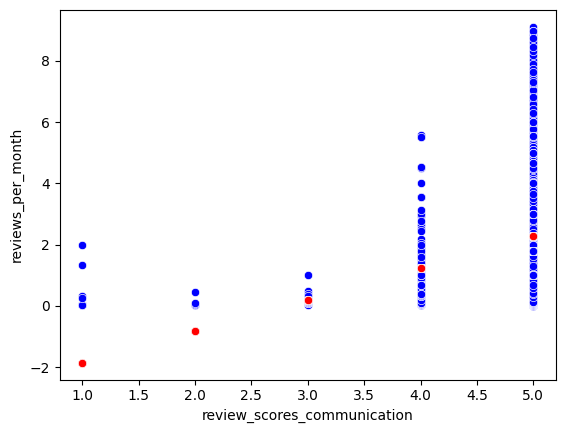

In [51]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome0)
sns.scatterplot(x = 'review_scores_communication', y = 'Predict6', color = "red", data = dfHome0)

In [52]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5

0.029980752637688957

In [53]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5

0.17314950949306485

## RESUMEN

In [54]:
# Para el tipo de casa "Entire Home/Apt", este fue el resumen de correlaciones:
print(f"Filtro 1: 'host_acceptance_rate vs host_response_rate': {coef_Correl_0}")
print(f"Filtro 2: 'host_acceptance_rate vs price': {coef_Correl_1}")
print(f"Filtro 3: 'host_acceptance_rate vs number_of_reviews': {coef_Correl_2}")
print(f"Filtro 4: 'review_scores_location vs review_scores_cleanliness': {coef_Correl_3}")
print(f"Filtro 5: 'availability_365 vs number_of_reviews': {coef_Correl_4}")
print(f"Filtro 6: 'reviews_per_month vs review_scores_communication': {coef_Correl_5}")

Filtro 1: 'host_acceptance_rate vs host_response_rate': 0.4424205544318947
Filtro 2: 'host_acceptance_rate vs price': 0.051285574755202776
Filtro 3: 'host_acceptance_rate vs number_of_reviews': 0.15768967181339927
Filtro 4: 'review_scores_location vs review_scores_cleanliness': 0.4098743052921234
Filtro 5: 'availability_365 vs number_of_reviews': 0.10772796754122008
Filtro 6: 'reviews_per_month vs review_scores_communication': 0.17314950949306485


## Mejor modelo matemático simple

In [55]:
# Modelo usando las regresiones lineales
dfModel = dfHome0[dfHome0["room_type_num"] == 0]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,95.865969,44.0,87.499378,90.0,5.0,4.971502,167.848592,5.0,99.0,147,92.386301,160.0,2.269795,0.88,5.0,1
2,94.046848,80.0,94.591786,100.0,5.0,4.971502,176.900649,5.0,189.0,133,92.988336,97.0,2.269795,0.64,5.0,23
3,93.469349,80.0,94.591786,100.0,5.0,4.971502,179.774318,5.0,125.0,1,92.560222,77.0,2.269795,0.51,5.0,2
4,94.017973,44.0,87.499378,90.0,5.0,4.623341,177.044333,4.0,167.0,16,92.841172,96.0,2.269795,0.61,5.0,0
5,93.065100,100.0,94.591786,100.0,5.0,4.971502,181.785886,5.0,94.0,96,92.352855,63.0,2.269795,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,91.245978,97.0,93.882545,99.0,5.0,4.971502,190.837943,5.0,156.0,246,92.767590,0.0,2.269795,1.78,5.0,0
6435,91.245978,99.0,94.591786,100.0,5.0,4.971502,190.837943,5.0,179.0,296,92.921444,0.0,2.269795,1.78,5.0,0
6437,91.245978,99.0,94.591786,100.0,5.0,4.971502,190.837943,5.0,481.0,324,94.941607,0.0,2.269795,1.78,5.0,0
6439,91.245978,92.3,92.889608,97.6,5.0,4.971502,190.837943,5.0,222.0,171,93.209083,0.0,2.269795,1.78,5.0,0


In [56]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
Predict3,1.000000
Predict5,1.000000
number_of_reviews,1.000000
number_of_reviews_ltm,0.558468
reviews_per_month,0.473681


<Axes: >

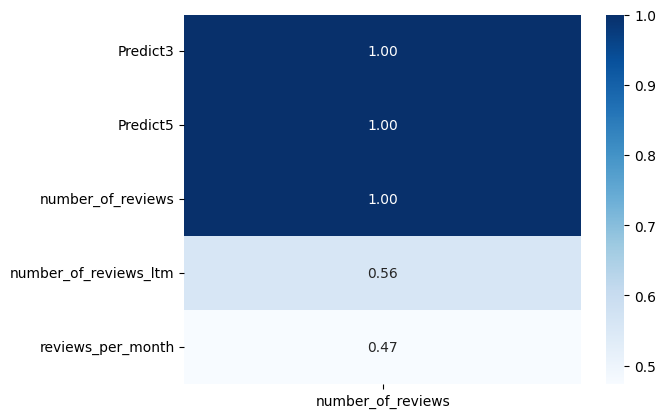

In [57]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

In [58]:
# Modelo original
df = df[df["room_type_num"] == 0]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,number_of_reviews,reviews_per_month,price,beds,amenities_num,neighbourhood_cleansed_num,host_response_time_num,bathroom_text_num,priceMex,neighbourhood_Category_num
0,14942,2009,90.0,44.0,0.0,4,1,1,47.654440,-122.336290,...,160.0,0.88,99.0,1.0,29.0,80,2,3,1936.04,2
2,31481,2009,100.0,80.0,1.0,2,1,1,47.554950,-122.386630,...,97.0,0.64,189.0,3.0,63.0,18,2,3,3696.08,4
3,31481,2009,100.0,80.0,1.0,2,1,1,47.556270,-122.386070,...,77.0,0.51,125.0,2.0,57.0,18,2,3,2444.50,4
4,14942,2009,90.0,44.0,0.0,4,1,1,47.656080,-122.336020,...,96.0,0.61,167.0,2.0,28.0,80,2,3,3265.85,2
5,102684,2010,100.0,100.0,1.0,1,1,1,47.679470,-122.371960,...,63.0,6.12,94.0,2.0,40.0,85,3,3,1838.26,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,107434423,2016,99.0,97.0,0.0,4673,1,1,47.601869,-122.316473,...,0.0,1.78,156.0,1.0,32.0,47,3,3,3050.74,2
6435,245843895,2019,100.0,99.0,1.0,2,1,1,47.643094,-122.354017,...,0.0,1.78,179.0,1.0,35.0,55,3,3,3500.52,1
6437,398317720,2021,100.0,99.0,1.0,130,1,1,47.676760,-122.358820,...,0.0,1.78,481.0,6.0,45.0,57,3,3,9406.44,1
6439,584875397,2024,97.6,92.3,0.0,1,0,1,47.531331,-122.374214,...,0.0,1.78,222.0,2.0,37.0,67,3,3,4341.43,4


In [59]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2

,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.558468
reviews_per_month,0.473681
number_of_reviews_l30d,0.369416
host_is_superhost,0.311137
minimum_nights_avg_ntm,0.307145
calculated_host_listings_count,0.230110
host_listings_count,0.212536


<Axes: >

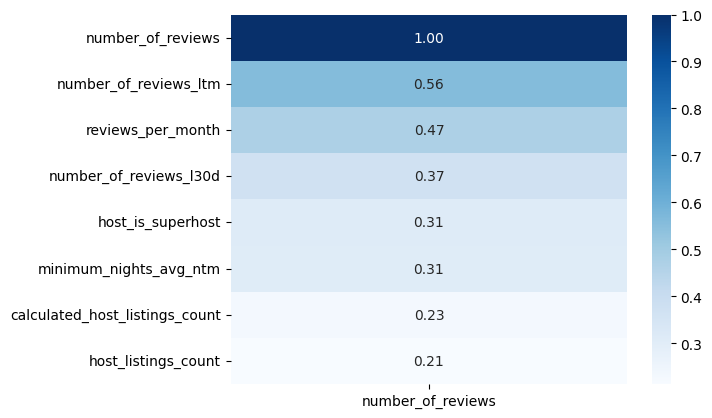

In [60]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

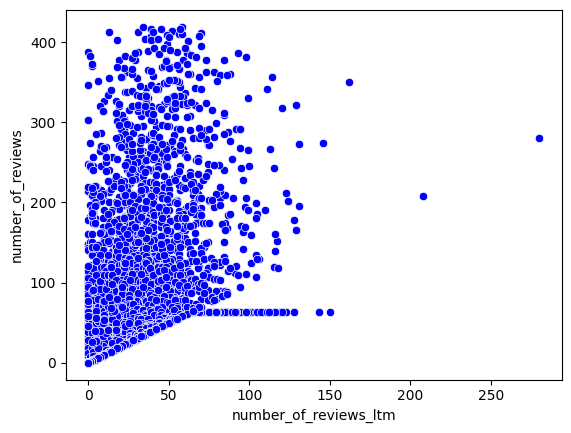

In [61]:
# Para este tipo de habitación "Entire Home / Apt", el mejor modelo matemático simple que describe de mejor manera el número de reseñas es el siguiente:
from turtle import color
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = dfHome0)

In [62]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome0[["number_of_reviews_ltm"]]
Var_Dep = dfHome0[["number_of_reviews"]]

In [63]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[2.03824649]]),
 'rank_': 1,
 'singular_': array([1713.71698162]),
 'intercept_': array([25.30673946])}

## Modelo Matemático: y = 2.03824649x + 25.30673946

In [64]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "number_of_reviews_ltm"
y_pred = model.predict(X = dfHome0[['number_of_reviews_ltm']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome0.insert(13, 'PredictFinal', y_pred)
dfHome0

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,PredictFinal,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,95.865969,44.0,87.499378,90.0,5.0,4.971502,167.848592,5.0,99.0,147,92.386301,160.0,27.344986,2.269795,0.88,5.0,1
2,0,94.046848,80.0,94.591786,100.0,5.0,4.971502,176.900649,5.0,189.0,133,92.988336,97.0,72.186409,2.269795,0.64,5.0,23
3,0,93.469349,80.0,94.591786,100.0,5.0,4.971502,179.774318,5.0,125.0,1,92.560222,77.0,29.383232,2.269795,0.51,5.0,2
4,0,94.017973,44.0,87.499378,90.0,5.0,4.623341,177.044333,4.0,167.0,16,92.841172,96.0,25.306739,2.269795,0.61,5.0,0
5,0,93.065100,100.0,94.591786,100.0,5.0,4.971502,181.785886,5.0,94.0,96,92.352855,63.0,149.639775,2.269795,6.12,5.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,0,91.245978,97.0,93.882545,99.0,5.0,4.971502,190.837943,5.0,156.0,246,92.767590,0.0,25.306739,2.269795,1.78,5.0,0
6435,0,91.245978,99.0,94.591786,100.0,5.0,4.971502,190.837943,5.0,179.0,296,92.921444,0.0,25.306739,2.269795,1.78,5.0,0
6437,0,91.245978,99.0,94.591786,100.0,5.0,4.971502,190.837943,5.0,481.0,324,94.941607,0.0,25.306739,2.269795,1.78,5.0,0
6439,0,91.245978,92.3,92.889608,97.6,5.0,4.971502,190.837943,5.0,222.0,171,93.209083,0.0,25.306739,2.269795,1.78,5.0,0


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

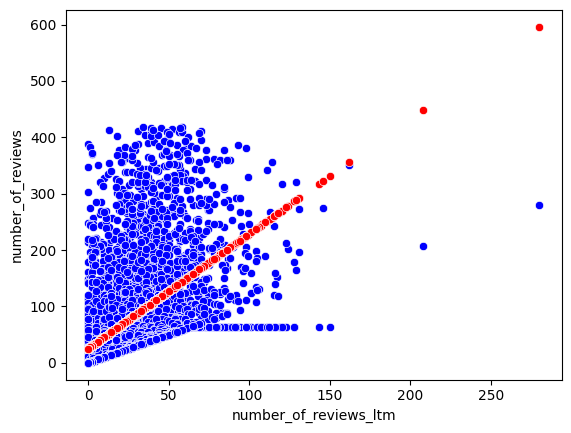

In [65]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = dfHome0)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'PredictFinal', color = "red", data = dfHome0)

In [66]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal

0.3118865343146622

In [67]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal

0.5584680244335052